# GERMANY

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hashlib
import importlib
import Functions
importlib.reload(Functions)
import plotly
import plotly.express as px

olympics = pd.read_csv('athlete_events.csv')
noc = pd.read_csv('noc_regions.csv')

## Uppgift 1 - Landstatistik 

In [96]:
germany, germany_all = Functions.hashed_names(olympics)
germany = germany.reset_index(drop=True)
germany.head(5)

,ID,Hash_Names,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,133,341116996c59575b8e0a66ad3d42f5063c72c9d5fd8840...,M,NaN,NaN,NaN,Germany,GER,1900 Summer,1900,Summer,Paris,Gymnastics,Gymnastics Men's Individual All-Around,NaN
1,389,0740975bf9235edebcecc325eeff6e611f13de55abfc11...,M,45.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",NaN
2,389,0740975bf9235edebcecc325eeff6e611f13de55abfc11...,M,45.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN
3,396,1acabc3b523678f8cd7b07dd38a5a0808f8d799b0a52c0...,F,25.0,165.0,55.0,Germany,GER,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Individual All-Around,NaN
4,396,1acabc3b523678f8cd7b07dd38a5a0808f8d799b0a52c0...,F,25.0,165.0,55.0,Germany,GER,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Team All-Around,NaN


### De sporter tyskland fått mest medaljer i

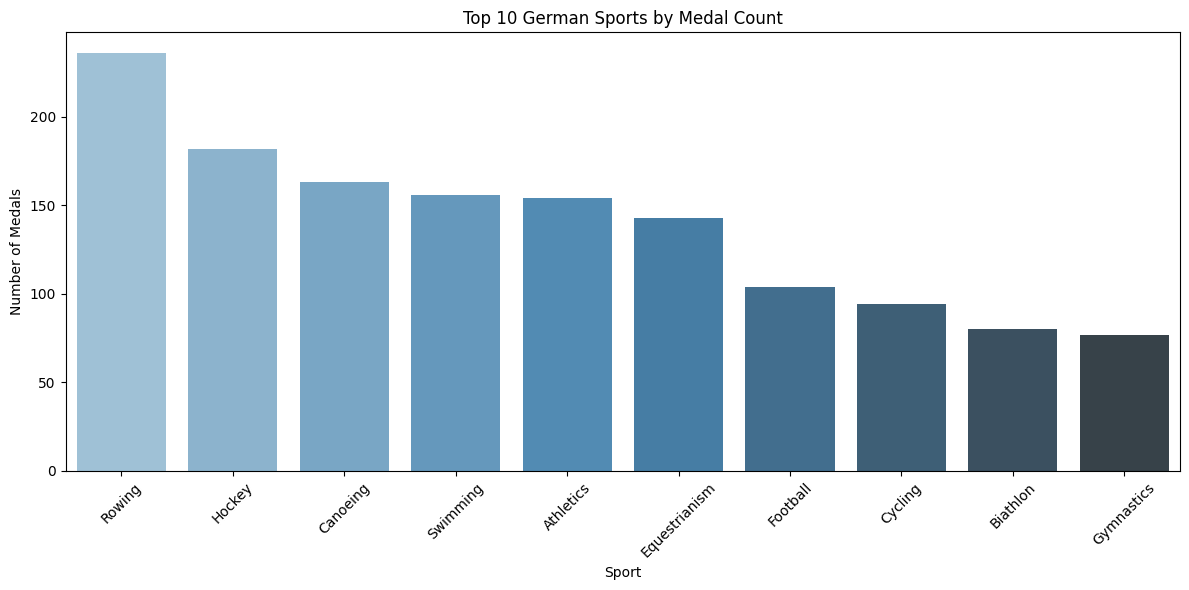

In [97]:
top10ports = Functions.top_german_sports(germany_df = germany, top_n = 10)

### Antal medaljer per OS

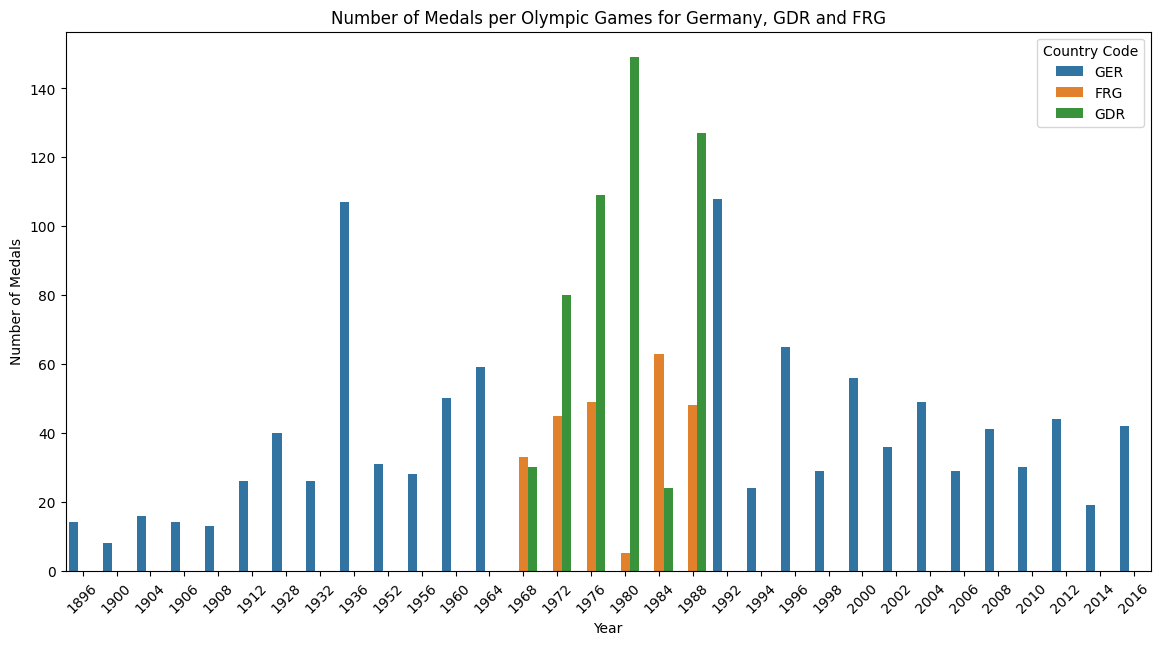

In [98]:
Functions.medals_each_year(olympics, ["GER", "GDR", "FRG"], "Number of Medals per Olympic Games for Germany, GDR and FRG")


### Histogram över åldrar

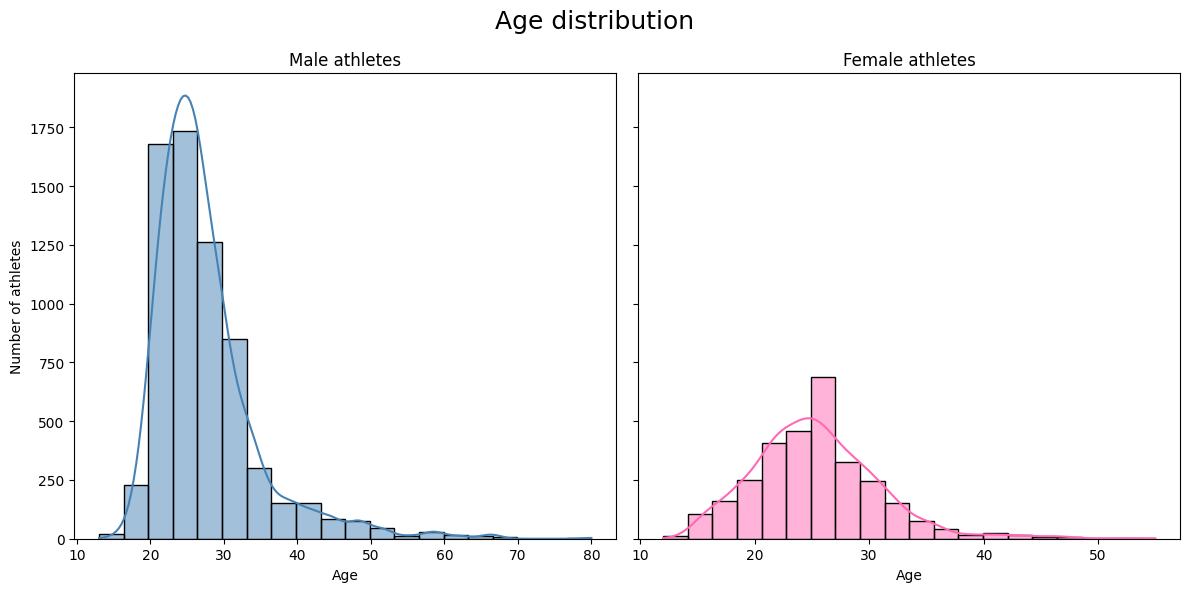

In [99]:
Functions.plot_age_distribution(germany)

### Väst och Öst-Tyskland

In [100]:
east_germany = germany_all[germany_all['NOC'] == 'GDR'].copy()
west_germany = germany_all[germany_all['NOC'] == 'FRG'].copy()

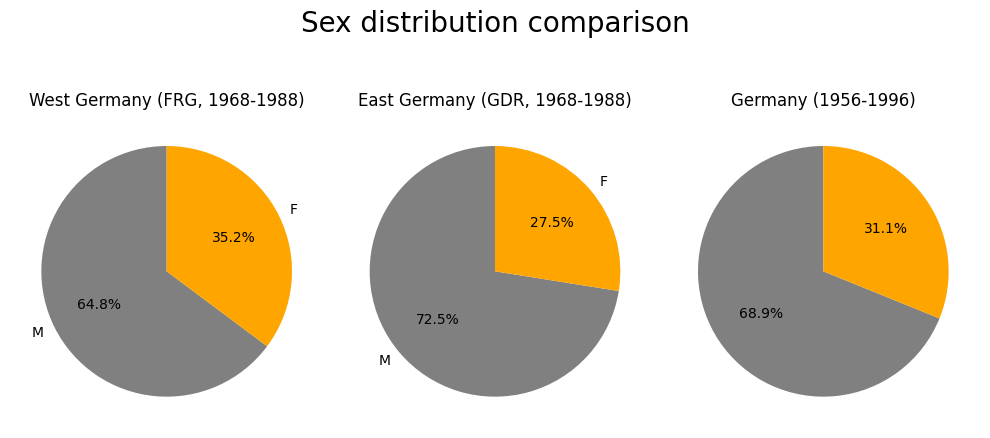

In [101]:
Functions.sex_dist_all(east_germany, west_germany, germany)

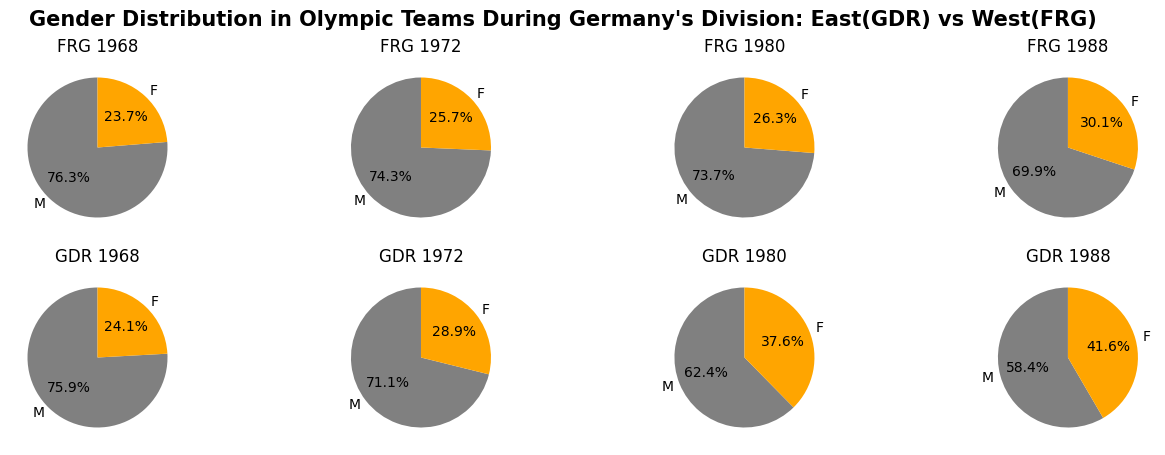

In [102]:
Functions.sex_distribution(west_germany, east_germany, [1968, 1972, 1980, 1988])

In [103]:
Functions.plot_participants(germany_all)

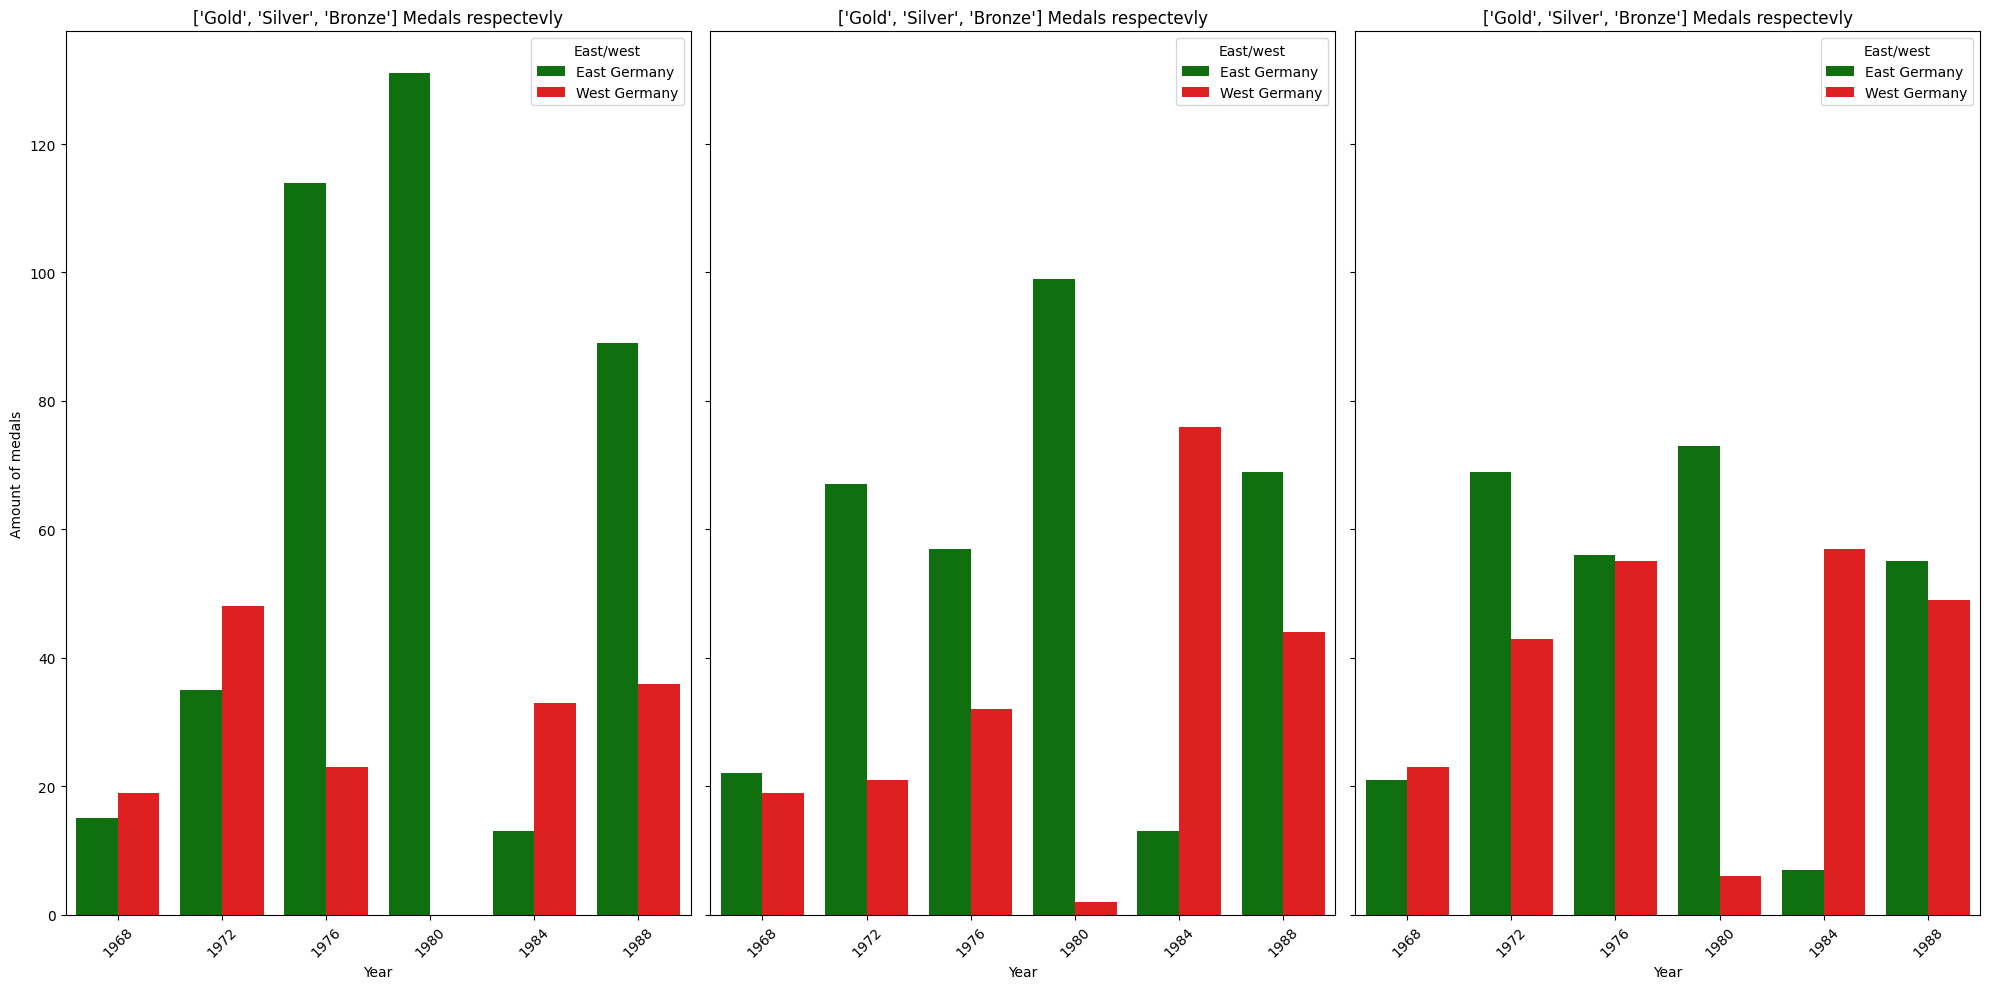

In [104]:
east = east_germany[['Year', 'Medal']].dropna(subset=['Medal'])
east_medals = east.groupby(['Year', 'Medal']).size().unstack(fill_value=0)
east_medals

west = west_germany[['Year', 'Medal']].dropna(subset=['Medal'])
west_medals = west.groupby(['Year', 'Medal']).size().unstack(fill_value=0)

fallen_years = sorted(set(west_medals.index).union(set(east_medals.index)))
Dif_medals = ['Gold', 'Silver', 'Bronze']

fig, axes= plt.subplots(1,3, figsize=(20,10),sharey=True)


for i, medal in enumerate (Dif_medals):
    ax = axes[i]
    plotting = pd.DataFrame({'Year': fallen_years, 'East Germany':east_medals[medal].values,'West Germany': west_medals[medal].values})

    medal_molten = plotting.melt(id_vars='Year', var_name='East/west', value_name= 'Number of medals')
    sns.barplot(data=medal_molten,x='Year', y='Number of medals', ax=ax, hue='East/west', palette= {'East Germany': 'green', 'West Germany': 'red'})
    ax.set_title(f'{Dif_medals} Medals respectevly')
    ax.set_xlabel('Year')
    ax.set_ylabel('Amount of medals')
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


## Uppgift 2 - Sportstatistik

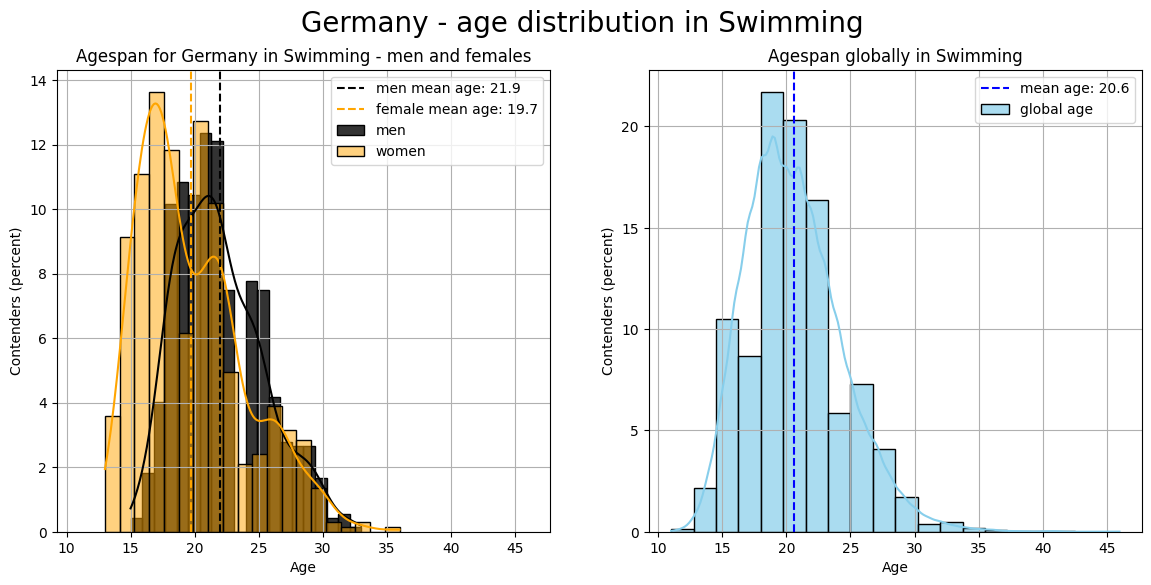

In [105]:
Functions.age_dist_per_sex(olympics, germany_all, country='Germany', sport='Swimming')

In [106]:
Functions.plot_efficiency(olympics, germany_all, country='Germany', sport='Swimming')

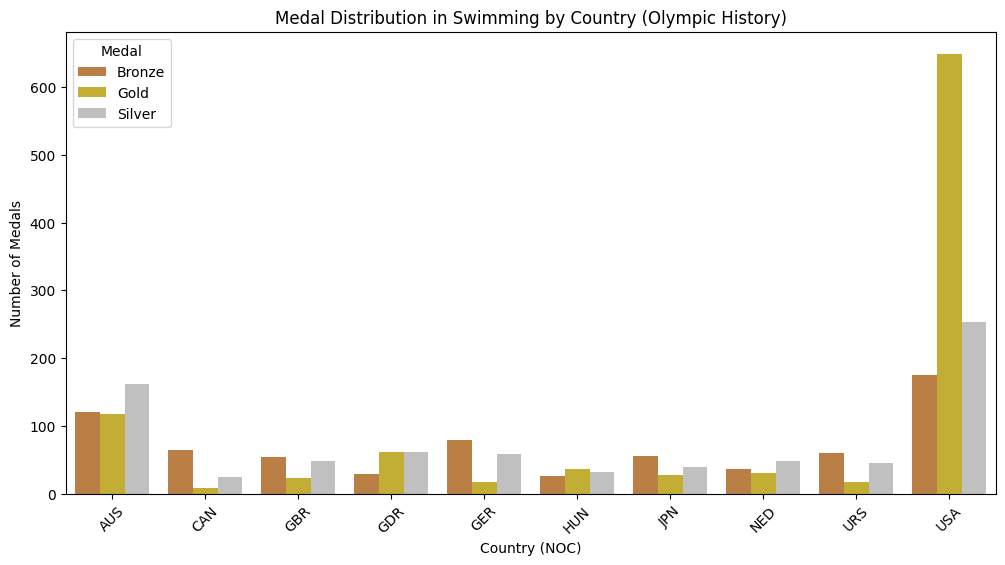

In [107]:
Functions.medal_distribution(olympics_df=olympics, sport='Swimming')

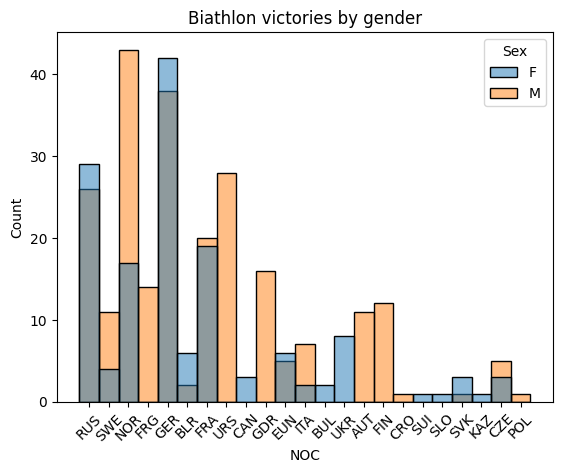

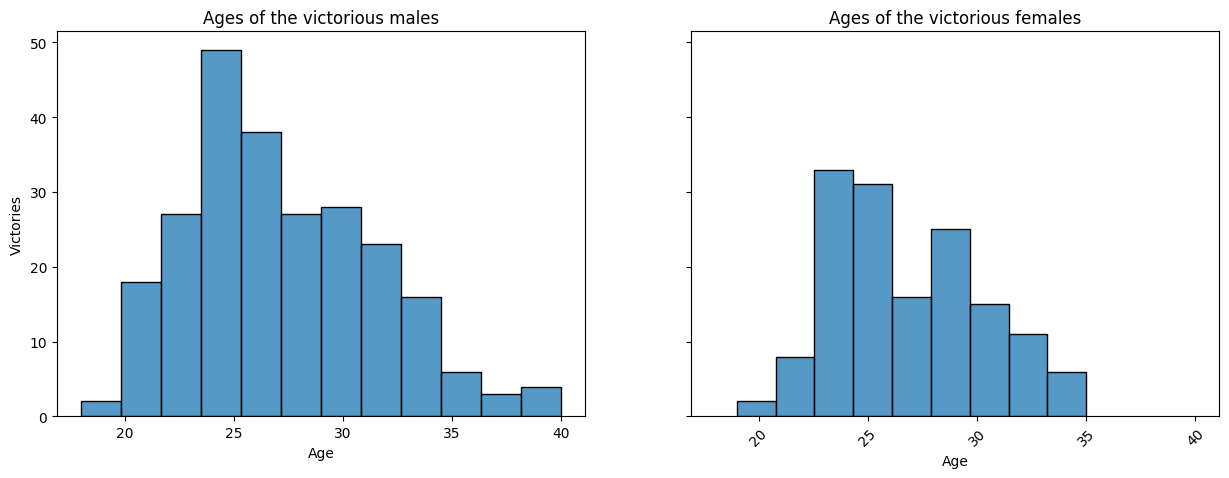

In [108]:
Biat= olympics[olympics['Sport']== 'Biathlon']
Biat=Biat.dropna()
M_Biat = Biat[Biat['Sex']== 'M']
F_Biat = Biat[Biat['Sex']== 'F']


sns.histplot(data=Biat, x='NOC', hue='Sex')
plt.title('Biathlon victories by gender')
plt.xticks(rotation=45)
plt.show()

fig, axes= plt.subplots(1,2, figsize=(15,5),sharey=True, sharex=True)
sns.histplot(data=M_Biat, x= 'Age', ax = axes[0])
axes[0].set_title('Ages of the victorious males')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Victories')
plt.xticks(rotation = 45)
sns.histplot(data=F_Biat, x= 'Age', ax = axes[1])
axes[1].set_title('Ages of the victorious females')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Victories')
plt.xticks(rotation = 45)
plt.show()

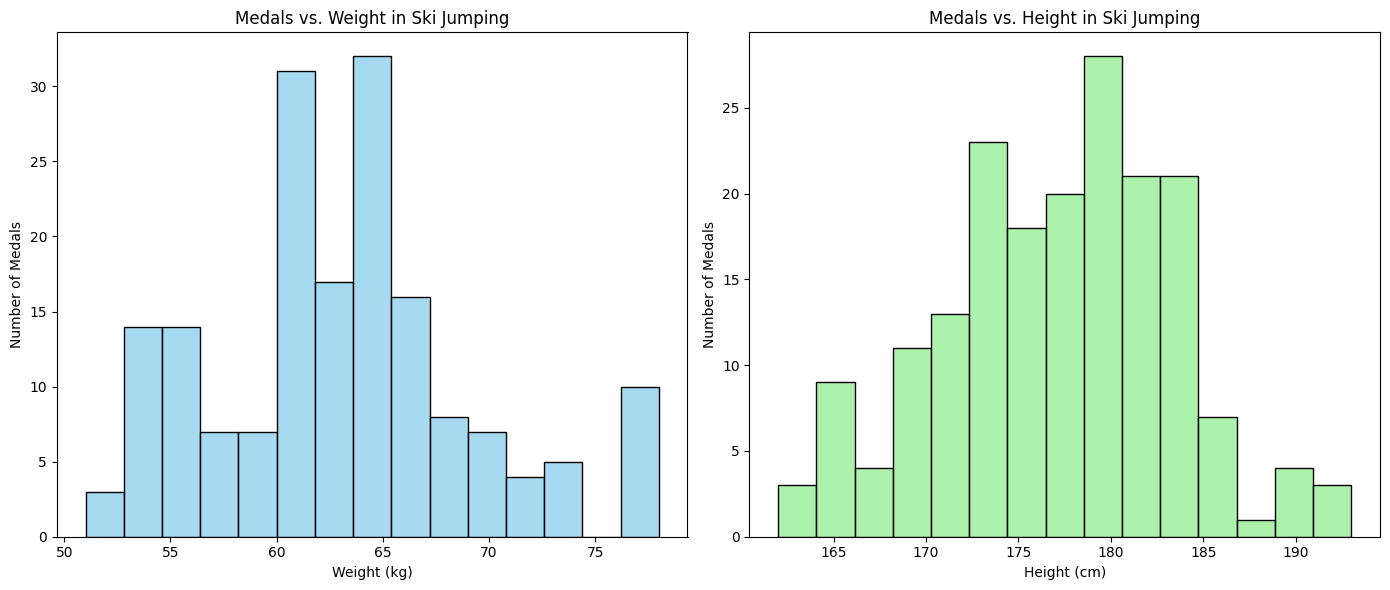

In [109]:
Functions.medal_distribution_weight_height(olympics, sport = "Ski Jumping")

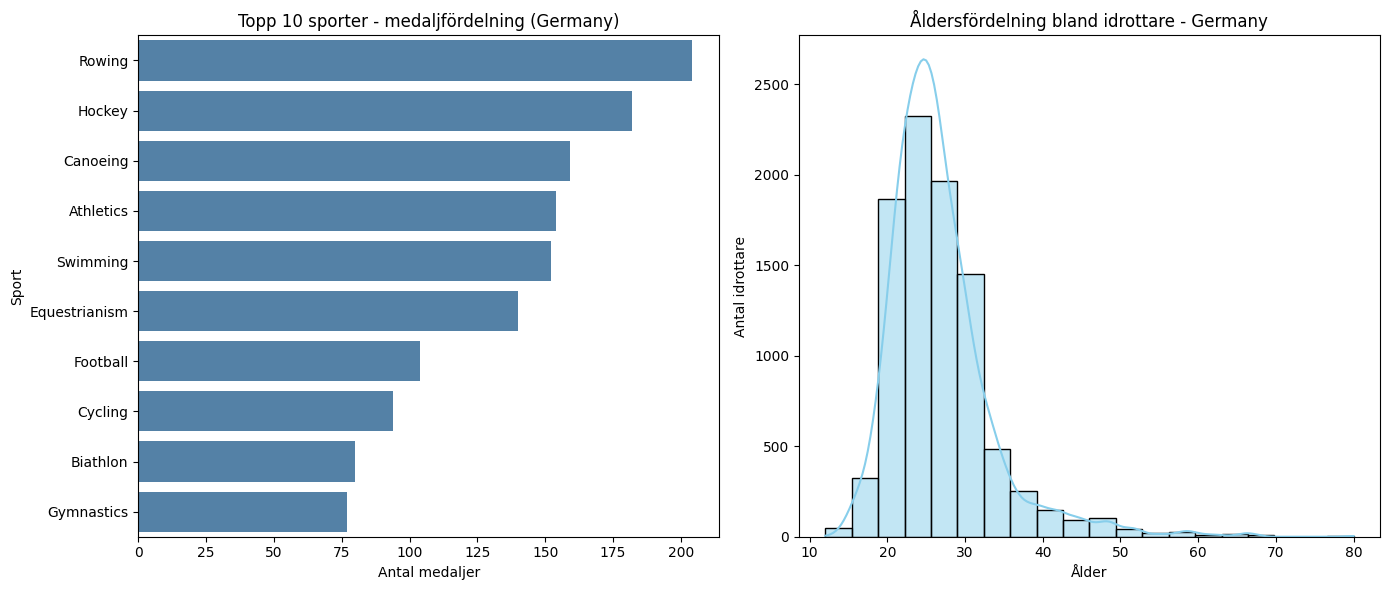

In [110]:
Functions.visualize_country_stats(olympics, "Germany")

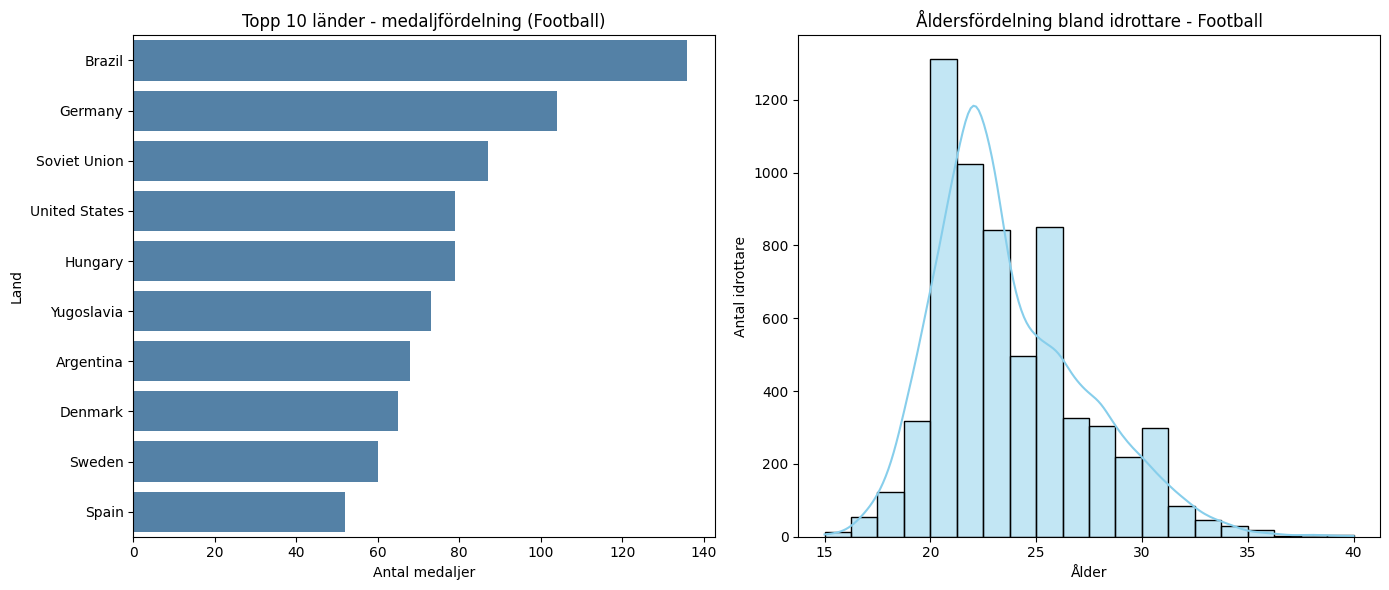

In [111]:
Functions.visualize_sport_stats(olympics, "Football")

# Kanske ha kvar kanske inte

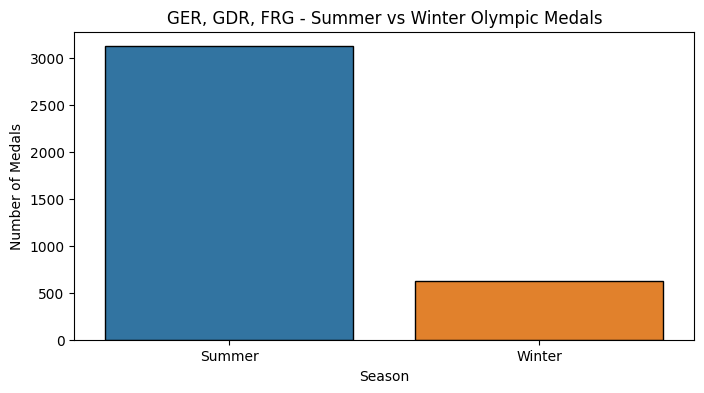

In [112]:
Functions.plot_summer_vs_winter(olympics)